In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = {
    'Consumo de Energia (kWh)': [1000, 3000, 1500, 2500, 1200, 3500],
    'Tempo de Operação (horas)': [200, 500, 300, 400, 250, 600],
    'Tipo de Energia': ['Elétrica', 'Gás', 'Elétrica', 'Gás', 'Elétrica', 'Gás'],
    'Classificação': ['Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente']
}

df = pd.DataFrame(dados)
print("Dataset:")
print(df)
print()

Dataset:
   Consumo de Energia (kWh)  Tempo de Operação (horas) Tipo de Energia  \
0                      1000                        200        Elétrica   
1                      3000                        500             Gás   
2                      1500                        300        Elétrica   
3                      2500                        400             Gás   
4                      1200                        250        Elétrica   
5                      3500                        600             Gás   

  Classificação  
0     Eficiente  
1   Ineficiente  
2     Eficiente  
3   Ineficiente  
4     Eficiente  
5   Ineficiente  



In [4]:
le_tipo = LabelEncoder()
le_classificacao = LabelEncoder()

X = df.copy()
X['Tipo de Energia'] = le_tipo.fit_transform(df['Tipo de Energia'])
X = X[['Consumo de Energia (kWh)', 'Tempo de Operação (horas)', 'Tipo de Energia']]

y = le_classificacao.fit_transform(df['Classificação'])

In [5]:
arvore = DecisionTreeClassifier(random_state=42, max_depth=3)
arvore.fit(X, y)

print(f"Acurácia: {arvore.score(X, y):.2%}\n")

Acurácia: 100.00%



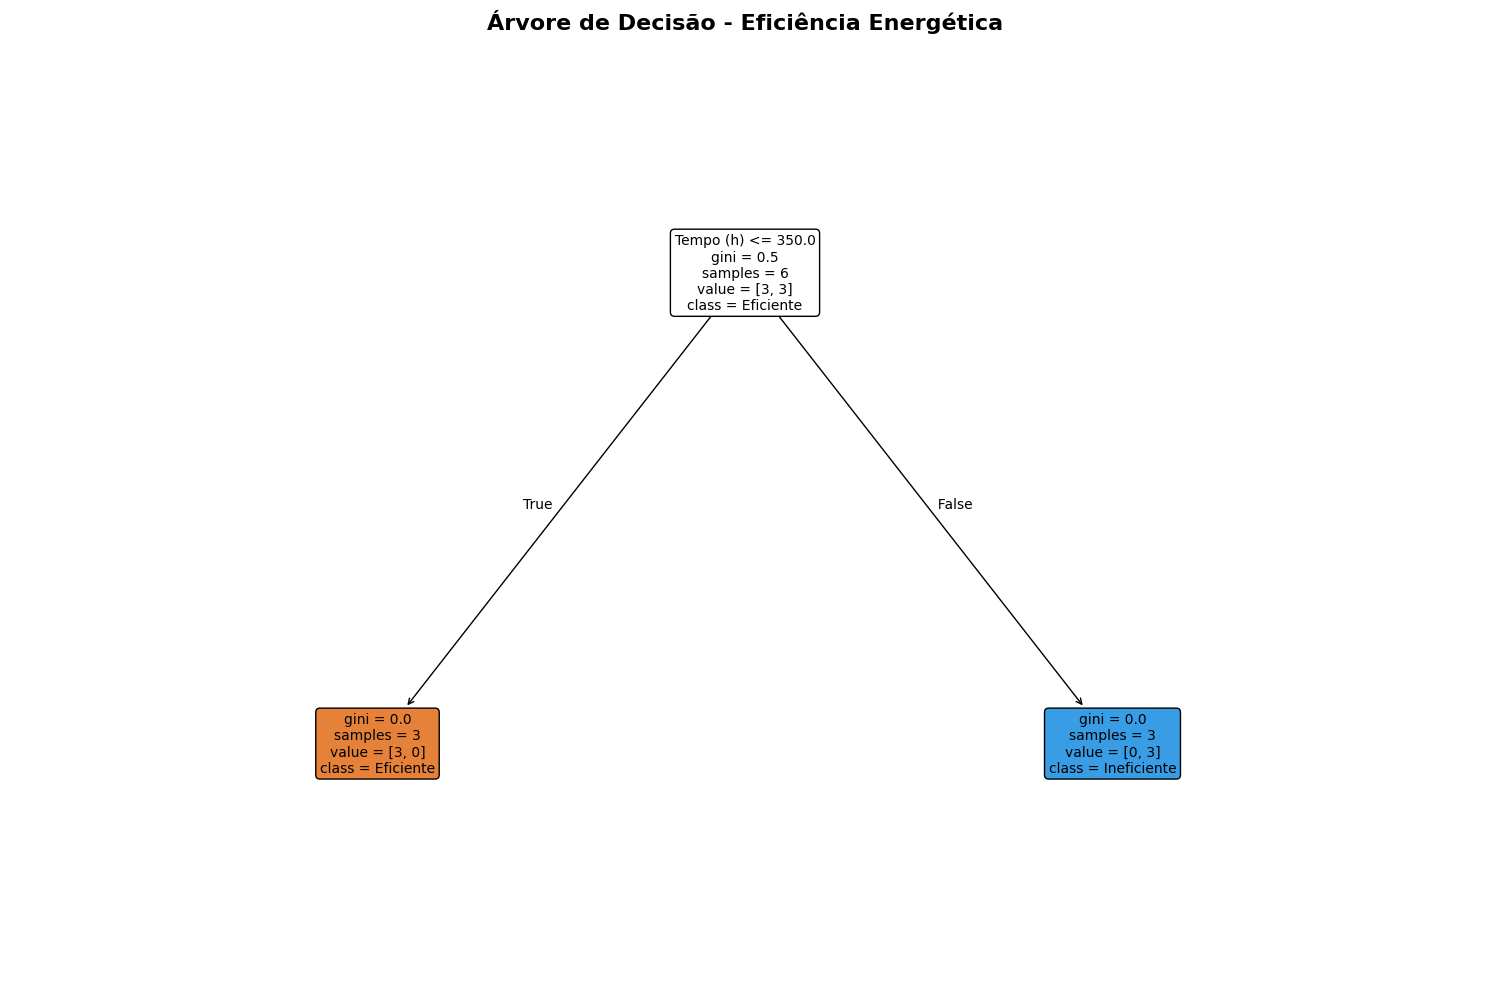

In [6]:
plt.figure(figsize=(15, 10))
tree.plot_tree(arvore, 
               feature_names=['Consumo (kWh)', 'Tempo (h)', 'Tipo Energia'],
               class_names=['Eficiente', 'Ineficiente'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Árvore de Decisão - Eficiência Energética', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

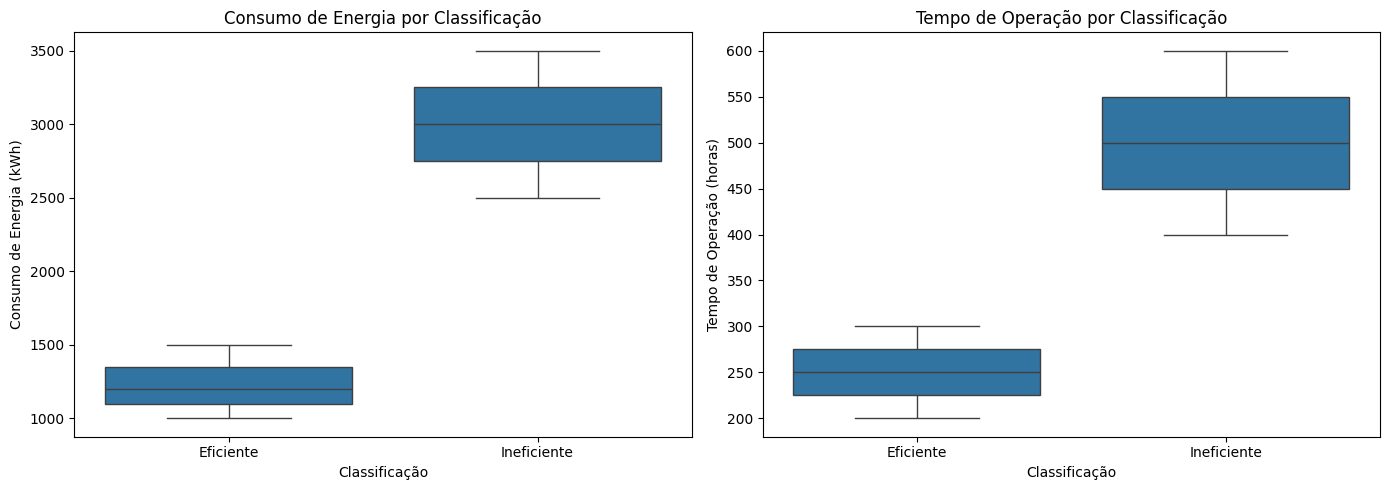

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x='Classificação', y='Consumo de Energia (kWh)', data=df, ax=axes[0])
axes[0].set_title('Consumo de Energia por Classificação', fontsize=12)

sns.boxplot(x='Classificação', y='Tempo de Operação (horas)', data=df, ax=axes[1])
axes[1].set_title('Tempo de Operação por Classificação', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_9124\1811803787.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classificacao_counts.index, y=classificacao_counts.values, palette=['green', 'red'])


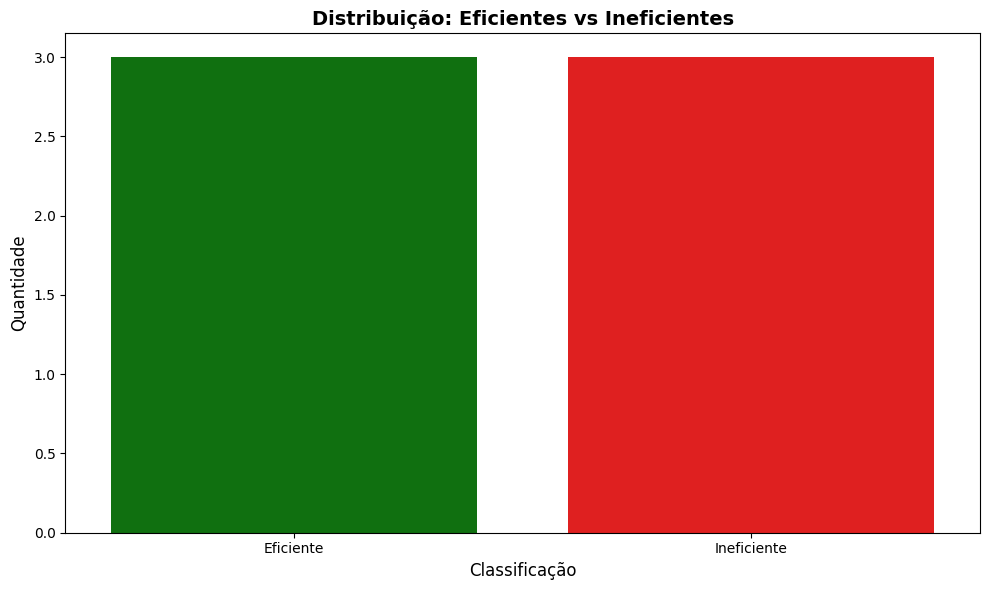

In [8]:
classificacao_counts = df['Classificação'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=classificacao_counts.index, y=classificacao_counts.values, palette=['green', 'red'])
plt.title('Distribuição: Eficientes vs Ineficientes', fontsize=14, fontweight='bold')
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.tight_layout()
plt.show()

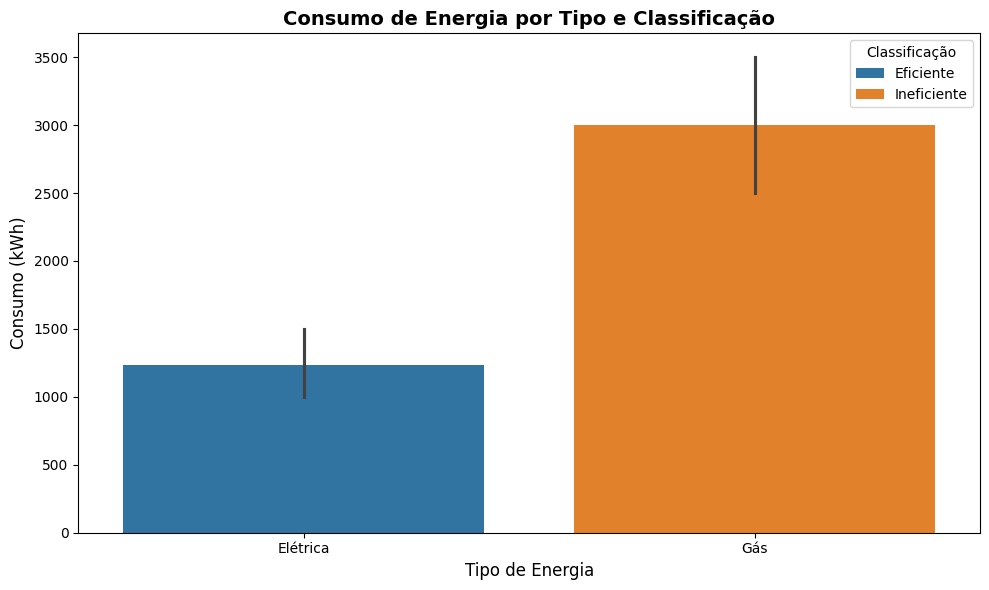

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Energia', y='Consumo de Energia (kWh)', hue='Classificação', data=df)
plt.title('Consumo de Energia por Tipo e Classificação', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Energia', fontsize=12)
plt.ylabel('Consumo (kWh)', fontsize=12)
plt.legend(title='Classificação')
plt.tight_layout()
plt.show()